__Calculate $ \text{NO}_x$ Emission factor for different speed in the Dutch highway__

In this part, we try to calculate emission factors for small vehicles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Grouper
from pandas import read_csv
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from scipy import stats

We already derived emission factor manually for $NO_x$ from the RIVM form and saved it in the file 'EmissionFactorNOx.xlsx'.

In [3]:
# Read the excel file for the emission factors of different vehicles
df = pd.read_excel('/Data/EmissionFactorNOx.xlsx')

# Optional: Display the first few rows of the dataframe to verify the data was loaded correctly
print(df.head())

  VehicleType  Speed      2019       2023
0       Small     80     0.229     0.1811
1         NaN    100     0.252     0.1898
2         NaN    120     0.315     0.2583
3         NaN    130     0.350     0.2596
4      Middle     80  2299.000  1530.0000


In [5]:
# Plot the small vehicle EF according to the speed.
# Select only the first 4 rows (0-3) which contain data for small vehicles
small_vehicles = df.iloc[0:4]

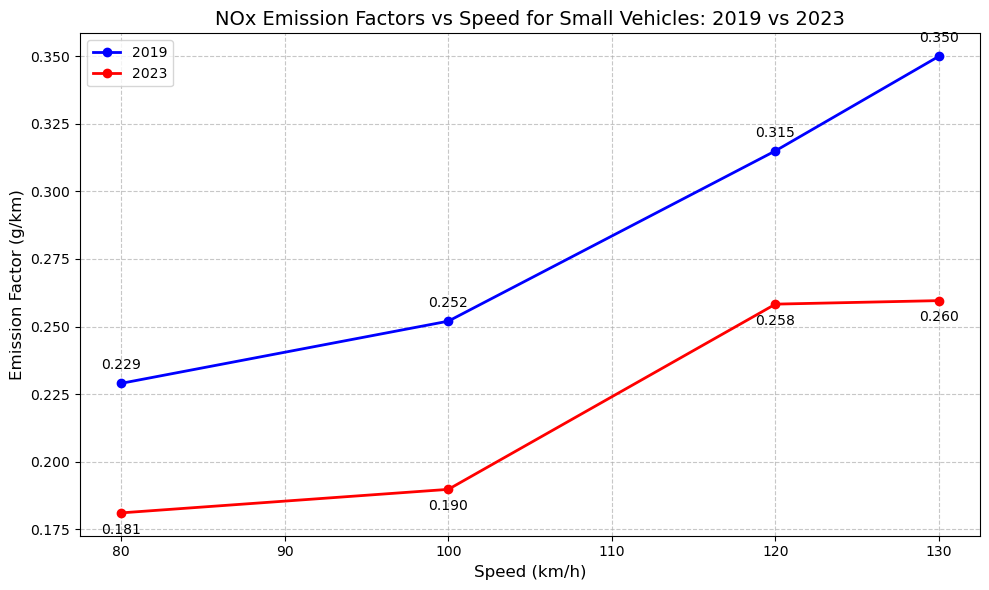


Small Vehicles Data:
   Speed   2019    2023
0     80  0.229  0.1811
1    100  0.252  0.1898
2    120  0.315  0.2583
3    130  0.350  0.2596


In [7]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(small_vehicles['Speed'], small_vehicles[2019], 
         label='2019', marker='o', color='blue', linewidth=2)
plt.plot(small_vehicles['Speed'], small_vehicles[2023], 
         label='2023', marker='o', color='red', linewidth=2)

# Customize the plot
plt.xlabel('Speed (km/h)', fontsize=12)
plt.ylabel('Emission Factor (g/km)', fontsize=12)
plt.title('NOx Emission Factors vs Speed for Small Vehicles: 2019 vs 2023', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Add data points labels
for i in range(len(small_vehicles)):
    plt.annotate(f'{small_vehicles[2019].iloc[i]:.3f}', 
                (small_vehicles['Speed'].iloc[i], small_vehicles[2019].iloc[i]),
                textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{small_vehicles[2023].iloc[i]:.3f}', 
                (small_vehicles['Speed'].iloc[i], small_vehicles[2023].iloc[i]),
                textcoords="offset points", xytext=(0,-15), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

# Print the data for verification
print("\nSmall Vehicles Data:")
print(small_vehicles[['Speed', 2019, 2023]])

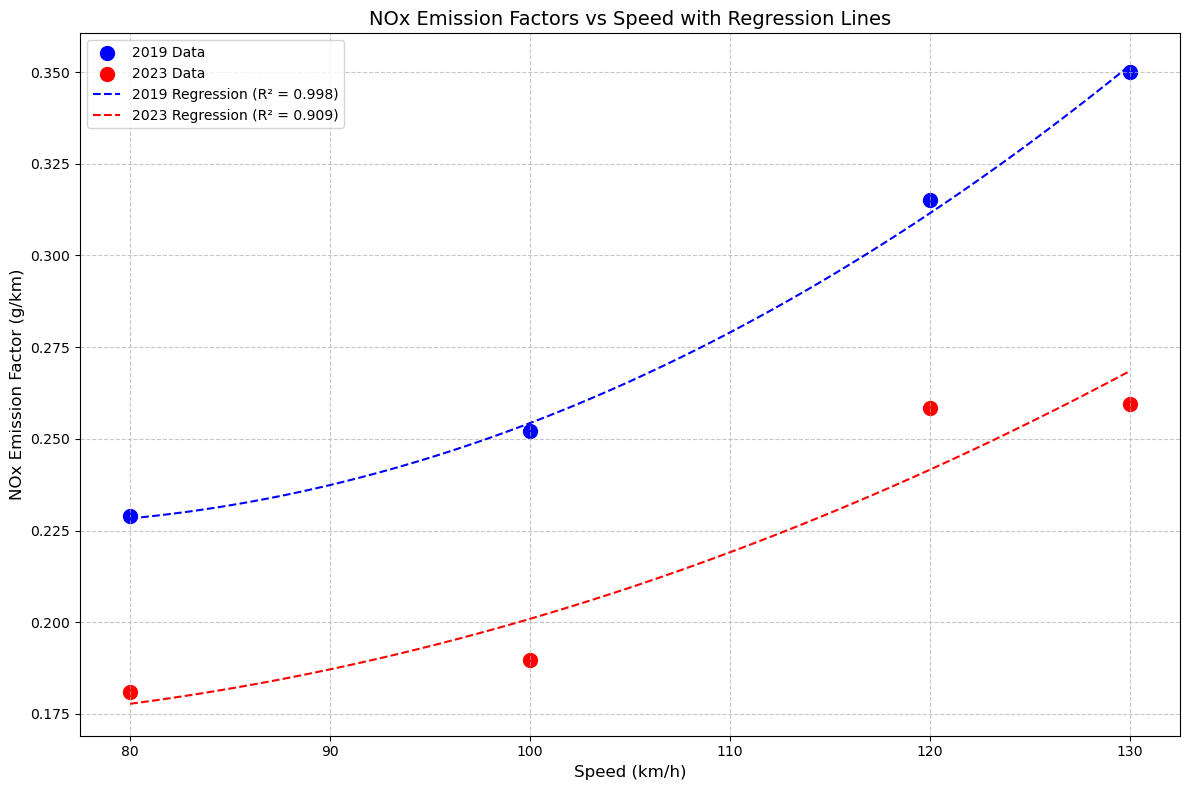


Regression Equations:
2019: NOx = 0.000039*speed² + -0.005723*speed + 0.436447
2023: NOx = 0.000022*speed² + -0.002780*speed + 0.260117

At 100 km/h:
2019 estimated emission: 0.254 g/km
2023 estimated emission: 0.201 g/km


In [9]:
# For small vehicle, use regression to find the function of emission factor based on the vehicle speed
# Select only the first 4 rows (0-3) which contain data for small vehicles
small_vehicles = df.iloc[0:4]

# Prepare the data
speeds = small_vehicles['Speed'].values
emissions_2019 = small_vehicles[2019].values
emissions_2023 = small_vehicles[2023].values

# Create polynomial regression (2nd degree) for both years
poly_2019 = np.polyfit(speeds, emissions_2019, 2)
poly_2023 = np.polyfit(speeds, emissions_2023, 2)

# Create functions for the polynomial fits
def emission_function_2019(speed):
    return poly_2019[0]*speed**2 + poly_2019[1]*speed + poly_2019[2]

def emission_function_2023(speed):
    return poly_2023[0]*speed**2 + poly_2023[1]*speed + poly_2023[2]

# Create smooth line for plotting
speed_range = np.linspace(min(speeds), max(speeds), 100)
emissions_fit_2019 = emission_function_2019(speed_range)
emissions_fit_2023 = emission_function_2023(speed_range)

# Calculate R-squared values
r2_2019 = 1 - (sum((emissions_2019 - emission_function_2019(speeds))**2) / 
               sum((emissions_2019 - np.mean(emissions_2019))**2))
r2_2023 = 1 - (sum((emissions_2023 - emission_function_2023(speeds))**2) / 
               sum((emissions_2023 - np.mean(emissions_2023))**2))

# Plot the data and regression lines
plt.figure(figsize=(12, 8))

# Plot original data points
plt.scatter(speeds, emissions_2019, color='blue', label='2019 Data', s=100)
plt.scatter(speeds, emissions_2023, color='red', label='2023 Data', s=100)

# Plot regression lines
plt.plot(speed_range, emissions_fit_2019, 'b--', 
         label=f'2019 Regression (R² = {r2_2019:.3f})')
plt.plot(speed_range, emissions_fit_2023, 'r--', 
         label=f'2023 Regression (R² = {r2_2023:.3f})')

# Customize the plot
plt.xlabel('Speed (km/h)', fontsize=12)
plt.ylabel('NOx Emission Factor (g/km)', fontsize=12)
plt.title('NOx Emission Factors vs Speed with Regression Lines', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Print the regression equations
print("\nRegression Equations:")
print(f"2019: NOx = {poly_2019[0]:.6f}*speed² + {poly_2019[1]:.6f}*speed + {poly_2019[2]:.6f}")
print(f"2023: NOx = {poly_2023[0]:.6f}*speed² + {poly_2023[1]:.6f}*speed + {poly_2023[2]:.6f}")

# Example usage of the functions
test_speed = 100
print(f"\nAt {test_speed} km/h:")
print(f"2019 estimated emission: {emission_function_2019(test_speed):.3f} g/km")
print(f"2023 estimated emission: {emission_function_2023(test_speed):.3f} g/km")

We then have the equation to calculate emission factor for small vehicles according to the speed. For medium and large vehicles the emission factor remains the same for highway scenrios.